In [93]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, ttest_rel
%matplotlib inline

def get_countries_stats(*as_of_date):

    countries_all = np.unique(tb[['home_team', 'away_team']].values)

    home_goals = []
    away_goals = []
    total_goals = []
    no_home_games = []
    no_away_games = []
    win_games = []
    win_games_away = []
    win_games_home = []
    loss_games = []
    loss_games_away = []
    loss_games_home = []
    draws_games = []
    draws_games_away = []
    draws_games_home = []
    total_games = []
    win_percentage = []
    loss_percentage = []
    draw_percentage = []
    win_percentage_as_home = []
    win_percentage_as_away = []
    loss_percentage_as_home = []
    loss_percentage_as_away = []
    draw_percentage_as_home = []
    draw_percentage_as_away = []

    as_of_is_specified = False
    if len(as_of_date) > 0 :
        as_of_is_specified = True

    for country in countries_all:
        is_country_as_home = None
        is_country_as_away = None
        country_rows_as_home = None
        country_rows_as_away = None
        country_rows_win_as_home = None
        country_rows_win_as_away = None
        country_rows_draws_as_home = None
        country_rows_draws_as_away = None
        country_rows_draw = None
        country_rows = None

        if as_of_is_specified:
            country_rows = tb[(tb['date'] > as_of_date[0]) & ((tb['home_team'] == country) | (tb['away_team'] == country))]
            is_country_as_home = (country_rows['home_team'] == country)
            is_country_as_away = (country_rows['away_team'] == country)
            country_rows_as_home = country_rows[is_country_as_home]
            country_rows_as_away = country_rows[is_country_as_away]
        else:
            country_rows = tb[((tb['home_team'] == country) | (tb['away_team'] == country))]
            is_country_as_home = country_rows['home_team'] == country
            is_country_as_away = country_rows['away_team'] == country
            country_rows_as_home = country_rows[is_country_as_home]
            country_rows_as_away = country_rows[is_country_as_away]

        country_rows_win_as_home = country_rows_as_home[country_rows_as_home['home_score'] > country_rows_as_home['away_score']]
        country_rows_losses_as_home = country_rows_as_home[country_rows_as_home['home_score'] < country_rows_as_home['away_score']]
        country_rows_draws_as_home = country_rows_as_home[country_rows_as_home['home_score'] == country_rows_as_home['away_score']]
        country_rows_win_as_away = country_rows_as_away[country_rows_as_away['home_score'] > country_rows_as_away['away_score']]
        country_rows_losses_as_away = country_rows_as_away[country_rows_as_away['home_score'] < country_rows_as_away['away_score']]
        country_rows_draws_as_away = country_rows_as_away[country_rows_as_away['home_score'] == country_rows_as_away['away_score']]


        total_games_as = len(country_rows)
        total_wins_as_home = len(country_rows_win_as_home)
        total_wins_as_away = len(country_rows_win_as_away)
        total_losses_as_home = len(country_rows_losses_as_home)
        total_losses_as_away = len(country_rows_losses_as_away)
        total_draws_as_home = len(country_rows_draws_as_home)
        total_draws_as_away = len(country_rows_draws_as_away)
        total_wins = total_wins_as_home + total_wins_as_away
        total_losses = total_losses_as_home + total_losses_as_away
        total_draws = total_draws_as_home + total_draws_as_away

        total_games_as_home = len(country_rows_as_home)
        total_games_as_away = len(country_rows_as_away)
        total_goals_as_home = country_rows_as_home['home_score'].sum()
        total_goals_as_away = country_rows_as_away['away_score'].sum()

        win_perc = total_wins / total_games_as if total_games_as > 0 else 0
        loss_perc = total_losses / total_games_as if total_games_as > 0 else 0
        draw_perc = total_draws / total_games_as if total_games_as > 0 else 0

        home_goals.append(total_goals_as_home)
        away_goals.append(total_goals_as_away)
        total_goals.append(total_goals_as_home + total_goals_as_away)
        no_home_games.append(total_games_as_home)
        no_away_games.append(total_games_as_away)
        win_games.append(total_wins)
        win_games_away.append(total_wins_as_away)
        win_games_home.append(total_wins_as_home)
        loss_games.append(total_losses)
        loss_games_away.append(total_losses_as_away)
        loss_games_home.append(total_losses_as_home)
        draws_games.append(total_draws)
        draws_games_away.append(total_draws_as_away)
        draws_games_home.append(total_draws_as_home)
        total_games.append(total_games_as)
        win_percentage.append(win_perc)
        loss_percentage.append(loss_perc)
        draw_percentage.append(draw_perc)
        win_percentage_as_home.append((total_wins_as_home / total_games_as_home) if total_games_as_home > 0 else 0)
        win_percentage_as_away.append(total_wins_as_away / total_games_as_away if total_games_as_away > 0 else 0)
        loss_percentage_as_home.append(total_losses_as_home / total_games_as_home if total_games_as_home > 0 else 0)
        loss_percentage_as_away.append(total_losses_as_away / total_games_as_away if total_games_as_away > 0 else 0)
        draw_percentage_as_home.append(total_draws_as_home / total_games_as_home if total_games_as_home > 0 else 0)
        draw_percentage_as_away.append(total_draws_as_away / total_games_as_away if total_games_as_away > 0 else 0)

    entries = {
        'country': countries_all,
        'wins': win_games,
        'losses': loss_games,
        'draws': draws_games,
        'total_games': total_games,
        'home_goals': home_goals,
        'away_goals': away_goals,
        'total_goals': total_goals,
        'home_games': no_home_games,
        'away_games': no_away_games,
        'wins_as_away': win_games_away,
        'wins_as_home': win_games_home,
        'losses_as_away': loss_games_away,
        'losses_as_home': loss_games_home,
        'draws_as_away' : draws_games_away,
        'draws_as_home': draws_games_home,
        'win_percentage': win_percentage,
        'loss_percentage': loss_percentage,
        'draw_percentage': draw_percentage,
        'win_percentage_as_home': win_percentage_as_home,
        'win_percentage_as_away': win_percentage_as_away,
        'loss_percentage_as_home': loss_percentage_as_home,
        'loss_percentage_as_away': loss_percentage_as_away,
        'draw_percentage_as_home': draw_percentage_as_home,
        'draw_percentage_as_away': draw_percentage_as_away
    }

    return pd.DataFrame(entries)

def find_country_with_most_goals_since_2010():
    country_stats_asof_2010 = get_countries_stats('2010-01-01')
    return country_stats_asof_2010[country_stats_asof_2010['total_goals'] == country_stats_asof_2010.max()['total_goals']]['country']

tb = pd.read_csv('data/results.csv')
#setting up values for our new column
tb['total_goals'] = tb['home_score'] + tb['away_score']
tb['home_win'] = np.where(tb['neutral'] == False, tb['home_score'] > tb['away_score'], '')

# What is the average number of goals for the home team?

In [94]:
#average goals for home team
average_home_score = tb['home_score'].mean()
print('The average number of goals for the home team is %s goals per game' % average_home_score)

The average number of goals for the home team is 1.745755783196268 goals


# What is the average number of goals for the away team?

In [95]:
#average goals for away team
average_away_score = tb['away_score'].mean()
print('The average number of goals for the away team is %s goals per game' % average_away_score)

The average number of goals for the away team is 1.187587168758717 goals


# Make a histogram of the number of total goals we can see in a game:

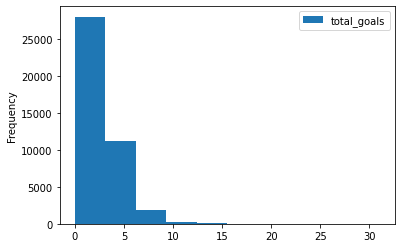

In [96]:
#making the histogram
tb.plot(x='date', y='total_goals', kind='hist')


# What is the home team’s win percentage? (excluding neutral matches)

In [97]:
#home team's win percentage
neutral_venue_matches = tb[tb['neutral'] == False]
total_home_wins_perc = (len(neutral_venue_matches[neutral_venue_matches['home_win'] == 'True']) / len(neutral_venue_matches)) * 100
print('The home team has a %s percent chance of winning a game' % round(total_home_wins_perc, 2))


The home team has a 50.49 percent chance of winning a game


# Which country has scored the most goals in FIFA events (qualifiers, cups, etc.) since 2010?

In [98]:
# country with most goals since 2010
country_with_most_goals_asof_2010 = find_country_with_most_goals_since_2010()
print('The FIFA country with the most goals since 2010 is %s' % country_with_most_goals_asof_2010)

The FIFA country with the most goals since 2010 is 104    Germany
Name: country, dtype: object


# Is the difference between the home and away teams average goals statistically significant?
We use a paired t-test on the away_score and home_score columns, with the following hypotheses:

* H0 = the sets of scores are not significantly different
* H1 = the sets of scores are significantly different

We determined that:

In [99]:
#we'll use a paired ttest, since we're studying two observations of the same thing (goals)
#null hypothesis: the sets of scores are not significantly different
#alternative hypothesis: the sets of scores are significantly different
home_scores = tb['home_score']
away_scores = tb['away_score']

ttest_values = ttest_rel(home_scores, away_scores)
if ttest_values[1] < 0.05:
    print('We REJECT the null hypothesis, meaning the difference of the averages is significant (p value = %s)' % ttest_values[1])
else:
    print('We ACCEPT the null hypothesis, the average scores for home and away are not significantly different')



We reject that the home and away scores are NOT statistically different, meaning the difference of the averages is significant


In [342]:
# country with most goals since 2010
country_with_most_goals_asof_2010 = find_country_with_most_goals_since_2010()
print('The FIFA country with the most goals since 2010 is %s' % country_with_most_goals_asof_2010)


The home team has a 38.01 percent chance of winning a game


In [343]:
# country with most goals since 2010
country_with_most_goals_asof_2010 = find_country_with_most_goals_since_2010()
print('The FIFA country with the most goals since 2010 is %s' % country_with_most_goals_asof_2010)


The FIFA country with the most goals since 2010 is 104    Germany
Name: country, dtype: object
